# (Dataset Exploration Title)
## by (abdallah mashaly)

## Preliminary Wrangling

a dataset containing the trip data of the ford gobike

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# importing the bike data
df=pd.read_csv('201902-fordgobike-tripdata.csv')
# an overview of data shape and type
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#overview of data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# First we clean the data.

In [5]:
#cheak for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#dropping N/A
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
#cheak for duplicates
df.duplicated().sum()

0

In [8]:
#convert duritaion time to minetus
df['duration_sec']=df['duration_sec']/60
#renaming the column
df.columns = df.columns.str.replace('duration_sec', 'duration_min')

In [9]:
#convert birth year column to age
df['member_birth_year']=2019-df['member_birth_year']
#renaming the column
df.columns = df.columns.str.replace('member_birth_year', 'member_age')

In [10]:
#changing date columns to datetime
df['start_time'] = pd.to_datetime(df['start_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.date


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

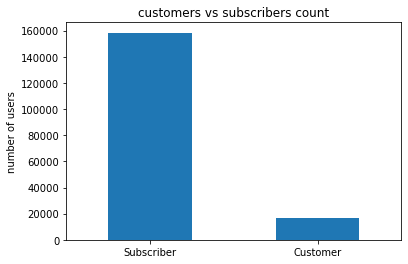

In [41]:
# which is more frequent customers or subscribers?
df.user_type.value_counts().plot(kind='bar')
plt.xticks(rotation=0);
plt.ylabel('number of users')
plt.title('customers vs subscribers count');

most of the bike users are subscribers

Text(0.5, 1.0, 'users gender count')

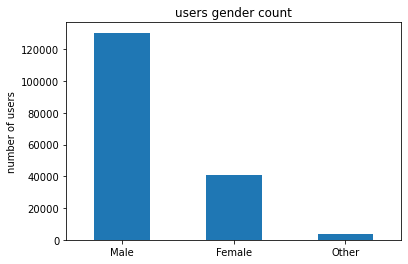

In [44]:
# whats the most common gender?
df.member_gender.value_counts().plot(kind='bar')
plt.xticks(rotation=0);
plt.ylabel('number of users')
plt.title('users gender count');

nearly 75% of users are males

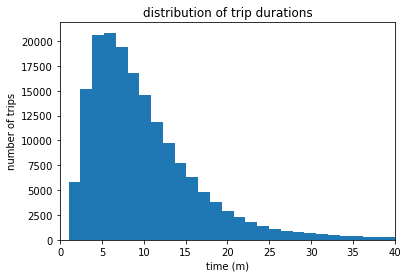

In [48]:
#duration distribution for a trip
plt.hist(df.duration_min,bins=1000)
plt.xlim((0,40));
plt.xlabel('time (m)')
plt.ylabel('number of trips')
plt.title('distribution of trip durations');

most trips are between 5 to 10 minutes

Text(0, 0.5, 'Number of Users')

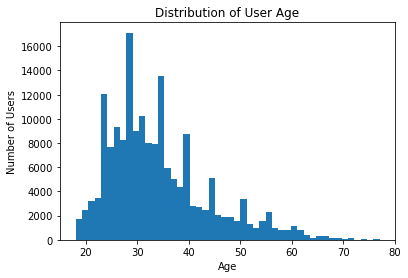

In [50]:
#age distribution for members
plt.hist(df.member_age,bins=100);
plt.xlim((15,80))
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')

most users range from 24 to 35
but useres with ages of 24,28,35,40 are more frequent than others
and there are no users under 18.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

there are some outliers in  the age and duration distrbutions
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

i adjusted the birth year to age and the duration to minutes and changed the date columns datatypes

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

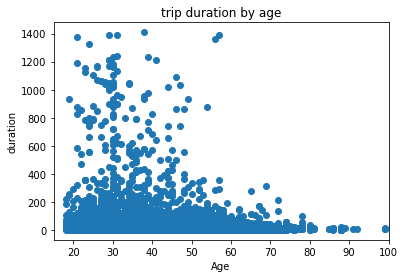

In [53]:
#relationship between age and duration
plt.scatter(y=df.duration_min,x=df.member_age)
plt.xlim((15,100))
plt.title('trip duration by age')
plt.xlabel('Age')
plt.ylabel('duration');

most long trips happen from users with ages between 20 and 40

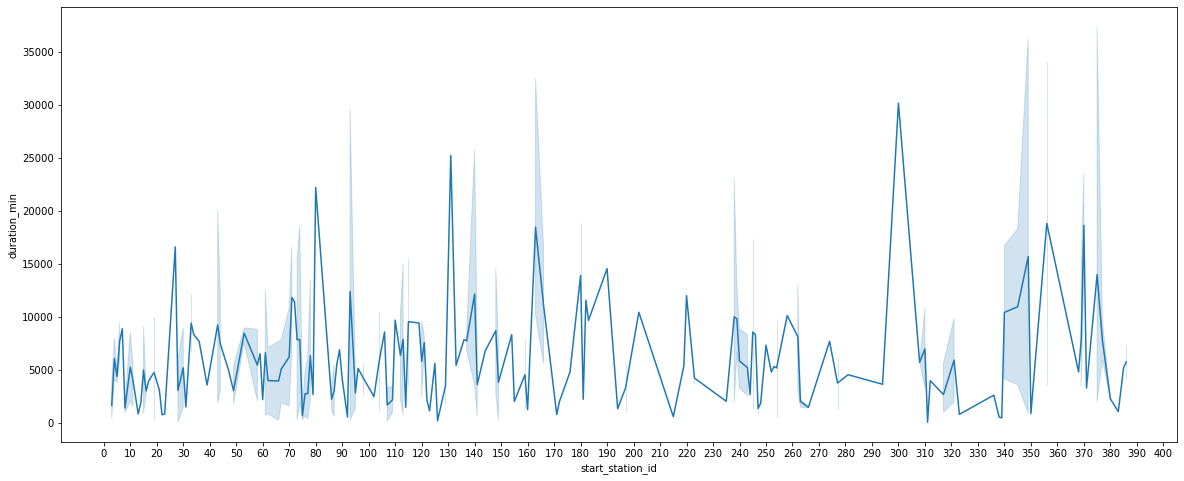

In [43]:
#total durations of trips from every station
total_time=df.groupby(['start_station_id']).duration_min.sum()
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_time)
plt.xticks(range(0, 401, 10));


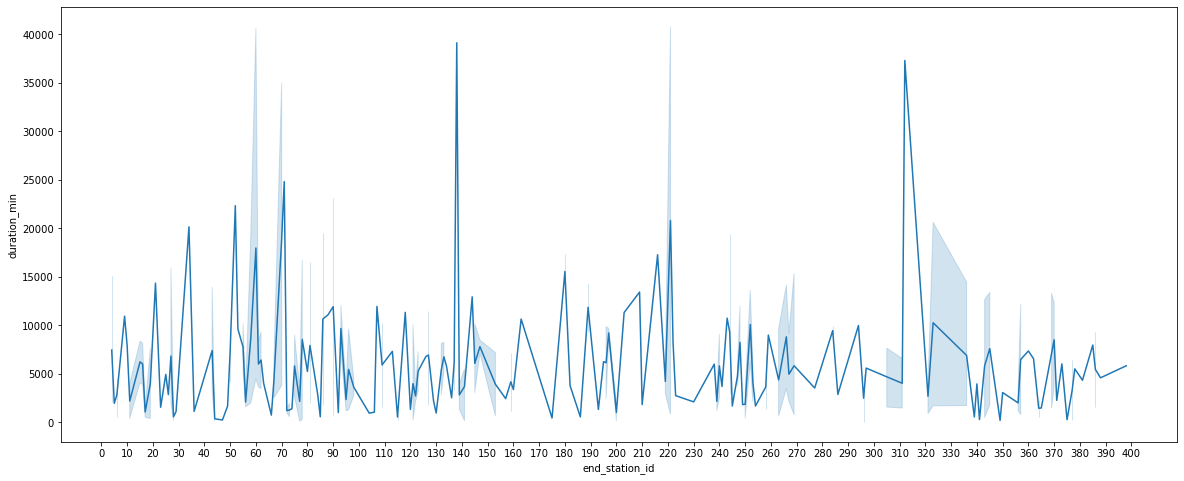

In [40]:
#total durations of trips to every station
total_time=df.groupby(['end_station_id']).duration_min.sum()
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['end_station_id'], y = total_time)
plt.xticks(range(0, 401, 10));


as we can see some stations as start tend to have longer durtaions and some other form an end takes more durations so the stations does effct the duration.

(0.0, 25.0)

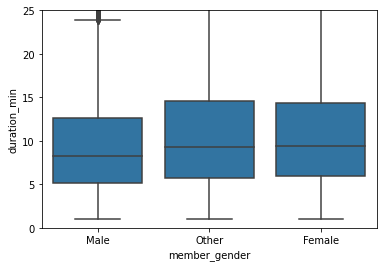

In [16]:
#duration by gender
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim((0,25));
plt.title('duration by gender')


the average duration for a female seems the longest.

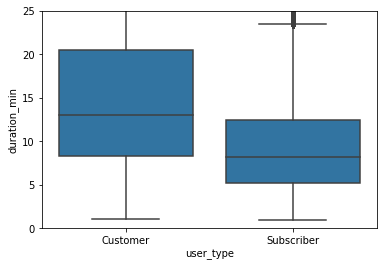

In [18]:
#duration by user type
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim((0,25));
plt.title('duration by user type')


the average duration for a customer is longer than a subscriber.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

the trip duration for users from 20 to 40 years old is longer than others , the start and end station does have a small effect on the duration
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

the average duration for customers is longer than subscribers and for females is longer than males even tho both are a minority 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


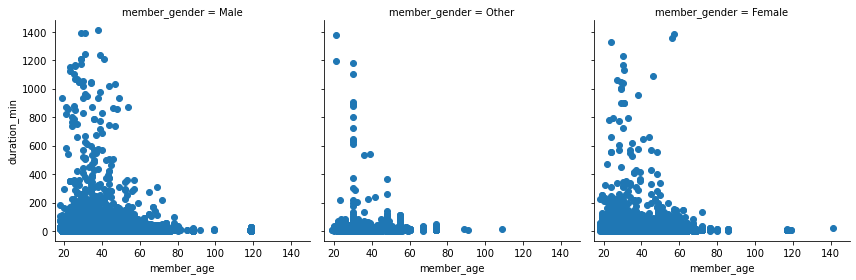

In [11]:
g=sb.FacetGrid(data=df,col='member_gender',col_wrap = 3, size = 4,)
g.map(plt.scatter,'member_age','duration_min')
plt.xlim((15,150));


most users in all genders are between 20 and 40 but the females have some remarkable outliers

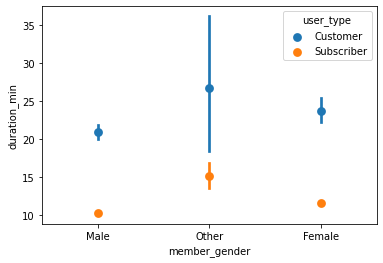

In [27]:
ax = sb.pointplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'user_type', linestyles = "")

customers of any gender seem to have a longer trip duration 

F:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


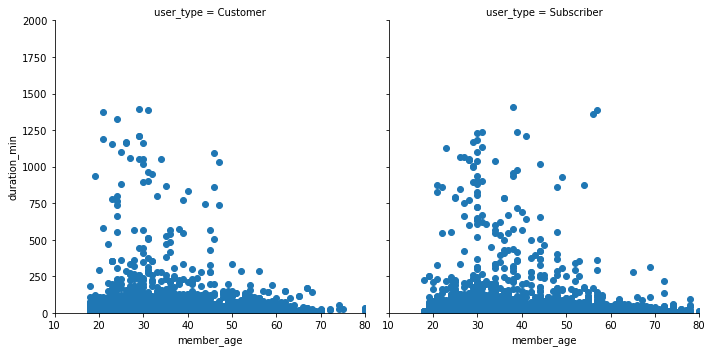

In [38]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [0, 2000])
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 1);

subscribers of age over 50 have a higher duration than customers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

most users are males but females and others have a higher average trip duration and other gender has a wider variety of trip durations
### Were there any interesting or surprising interactions between features?

old subscribers have a high trip duration even tho overall customers have a higher duration than subscribers 